In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from dataset import LayoutDataset
from models import LayoutMLP
from scipy.stats import kendalltau

2023-10-17 21:57:41.312158: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 21:57:42.225979: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
batch_size = 80
learning_rate = 1e-4
batch_per_file_size = 10
decay_rate = 0.95
node_embedding_size = 20
layers = [48, 32, 24, 16]

dataset = LayoutDataset(
    batch_size, train_sample_fraction=1.0,
    subset=None, build_tfrecords=False,
    batch_per_file_size=batch_per_file_size
)

2023-10-17 21:57:43.551799: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-17 21:57:43.661738: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-17 21:57:43.661973: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
mlp = LayoutMLP(
    batch_size,
    learning_rate=learning_rate,
    mask_max_len=dataset.n_config_nodes_upper_limit,
    batch_per_file_size=batch_per_file_size,
    decay_rate=decay_rate,
    node_embedding_size=node_embedding_size,
    validation_frequency=10_000,
    validations_without_improvement=3,
    layer_sizes=layers,
    loss='pairwise_hinge',
    l1_multiplier=5e-10,
    n_siblings=dataset.n_siblings
)
mlp.train(dataset, None)

2023-10-17 21:58:31.646026: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-17 21:58:31.654790: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fd343c01c60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-17 21:58:31.654818: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-10-17 21:58:31.668800: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-17 21:58:31.876081: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-10-17 21:58:31.993034: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifeti

iteration 500 training loss 4.1570883 lr 0.00010
iteration 1000 training loss 3.7008765 lr 0.00010
iteration 1500 training loss 3.9092422 lr 0.00010
iteration 2000 training loss 3.30828 lr 0.00010
iteration 2500 training loss 3.3723116 lr 0.00010
iteration 3000 training loss 3.5608277 lr 0.00010
iteration 3500 training loss 3.5949311 lr 0.00010
iteration 4000 training loss 3.5038393 lr 0.00010
iteration 4500 training loss 2.647843 lr 0.00010
iteration 5000 training loss 3.5418215 lr 0.00010
iteration 5500 training loss 3.1570082 lr 0.00010
iteration 6000 training loss 3.2074103 lr 0.00010
iteration 6500 training loss 2.63545 lr 0.00010
iteration 7000 training loss 2.760698 lr 0.00010
iteration 7500 training loss 3.228932 lr 0.00010
iteration 8000 training loss 3.3804393 lr 0.00010
iteration 8500 training loss 2.776314 lr 0.00010
iteration 9000 training loss 2.7404976 lr 0.00010
iteration 9500 training loss 3.3065858 lr 0.00010
iteration 10000 training loss 2.3142216 lr 0.00010
layout:n

layout:nlp:random 0.8297566079291308
layout:nlp:default 0.40477309364920033
layout:xla:random 0.43312694281052505
layout:xla:default 0.17604279875632825
epoch 0, it 70000 validation loss -0.461
iteration 70500 training loss 2.3767323 lr 0.00007
iteration 71000 training loss 1.3427423 lr 0.00007
iteration 71500 training loss 3.051155 lr 0.00007
iteration 72000 training loss 2.714775 lr 0.00007
iteration 72500 training loss 1.709476 lr 0.00007
iteration 73000 training loss 1.7531615 lr 0.00007
iteration 73500 training loss 2.3504145 lr 0.00007
iteration 74000 training loss 2.7173543 lr 0.00007
iteration 74500 training loss 1.5434321 lr 0.00007
iteration 75000 training loss 3.9337687 lr 0.00007
iteration 75500 training loss 2.1654444 lr 0.00007
iteration 76000 training loss 1.857394 lr 0.00007
iteration 76500 training loss 2.8542686 lr 0.00007
iteration 77000 training loss 1.8239568 lr 0.00007
iteration 77500 training loss 1.6764709 lr 0.00007
iteration 78000 training loss 1.6294055 lr 0.

iteration 137500 training loss 1.876411 lr 0.00005
iteration 138000 training loss 1.6965175 lr 0.00005
iteration 138500 training loss 1.6720458 lr 0.00005
iteration 139000 training loss 1.9421096 lr 0.00005
iteration 139500 training loss 2.6454957 lr 0.00005
iteration 140000 training loss 2.2236252 lr 0.00005
layout:nlp:random 0.8303935903366597
layout:nlp:default 0.42502400140758373
layout:xla:random 0.461640136392107
layout:xla:default 0.18212369131469455
epoch 0, it 140000 validation loss -0.475
stopping training


## Evaluate validation set

In [4]:
val_df = mlp.predict_over_dataset(dataset.valid_data, return_labels=True)

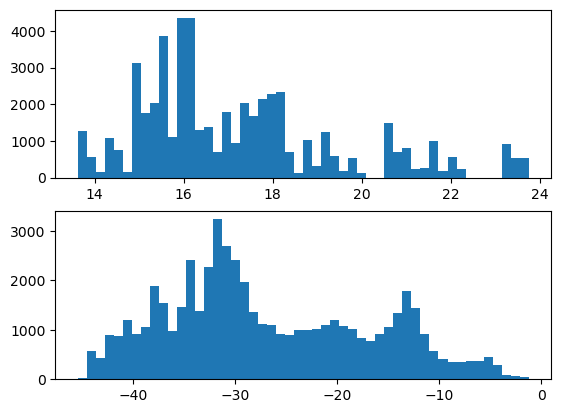

In [5]:
plt.subplot(2, 1, 1)
plt.hist(val_df['target'], bins=50)
plt.subplot(2, 1, 2)
plt.hist(val_df['prediction'], bins=50);

In [6]:
val_df.groupby('ID').apply(lambda x: x.min()).sort_values('prediction')

,ID,config_index,prediction,target
ID,,,,
b'layout:nlp:default:talking-heads_large_batch_size_16_train',b'layout:nlp:default:talking-heads_large_batch...,23,-45.416424,18.689348
b'layout:nlp:default:small_bert_bert_en_uncased_L-10_H-128_A-2_batch_size_32_test',b'layout:nlp:default:small_bert_bert_en_uncase...,39,-44.904690,13.623108
b'layout:nlp:random:small_bert_bert_en_uncased_L-10_H-128_A-2_batch_size_32_test',b'layout:nlp:random:small_bert_bert_en_uncased...,64,-44.536819,13.625170
b'layout:nlp:default:bert_en_cased_L-12_H-768_A-12_batch_size_16_test',b'layout:nlp:default:bert_en_cased_L-12_H-768_...,6,-43.133877,15.544790
b'layout:nlp:random:bert_en_cased_L-12_H-768_A-12_batch_size_16_test',b'layout:nlp:random:bert_en_cased_L-12_H-768_A...,158,-42.975975,15.545724
b'layout:nlp:default:small_bert_bert_en_uncased_L-10_H-768_A-12_batch_size_32_test',b'layout:nlp:default:small_bert_bert_en_uncase...,158,-42.177021,15.972469
b'layout:nlp:random:small_bert_bert_en_uncased_L-10_H-768_A-12_batch_size_32_test',b'layout:nlp:random:small_bert_bert_en_uncased...,155,-41.925919,15.973371
b'layout:nlp:default:small_bert_bert_en_uncased_L-10_H-256_A-4_batch_size_32_test',b'layout:nlp:default:small_bert_bert_en_uncase...,428,-41.249733,14.371652
b'layout:nlp:random:small_bert_bert_en_uncased_L-10_H-256_A-4_batch_size_32_test',b'layout:nlp:random:small_bert_bert_en_uncased...,133,-40.827339,14.374172


Text(0.5, 1.0, "b'layout:xla:default:inception_v3_batch_128_train'")

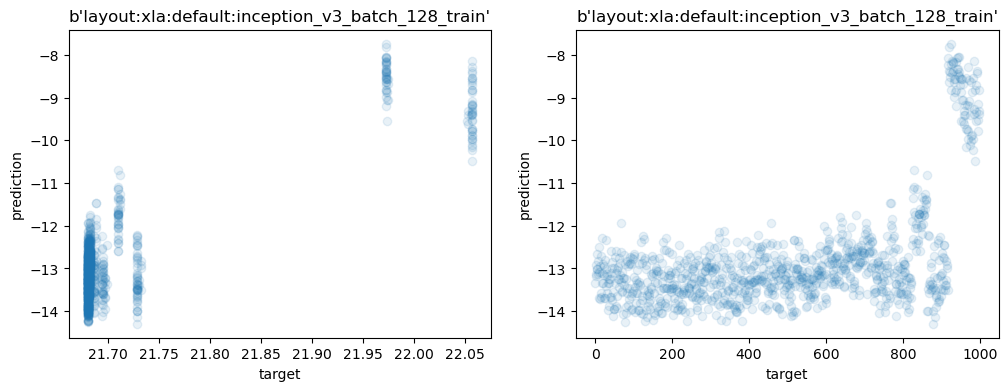

In [96]:
x_lin = np.linspace(15, 25, 100)
#plt.plot(x_lin, x_lin, color='orange')

random_sample = val_df.sample(10_000)
graph_id = np.random.choice(val_df['ID'].unique())
graph_id = b'layout:xla:default:inception_v3_batch_128_train'
random_sample = val_df[val_df['ID'] == graph_id].copy()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(
    random_sample.target,
    np.clip(random_sample.prediction, a_min=-500.0, a_max=1000.0),
    alpha=0.1,
    #c=random_sample['ID'].apply(lambda x: x.decode('UTF-8').split(':')[1] == 'xla').values.astype(float)
)
plt.xlabel('target')
plt.ylabel('prediction')
plt.title(graph_id)
#plt.colorbar()

random_sample.sort_values('target', inplace=True)
plt.subplot(1, 2, 2)
plt.scatter(
    np.arange(len(random_sample)),
    np.clip(random_sample.prediction, a_min=-500.0, a_max=1000.0),
    alpha=0.1,
    #c=random_sample['ID'].apply(lambda x: x.decode('UTF-8').split(':')[1] == 'xla').values.astype(float)
)
plt.xlabel('target')
plt.ylabel('prediction')
plt.title(graph_id)
#plt.colorbar()

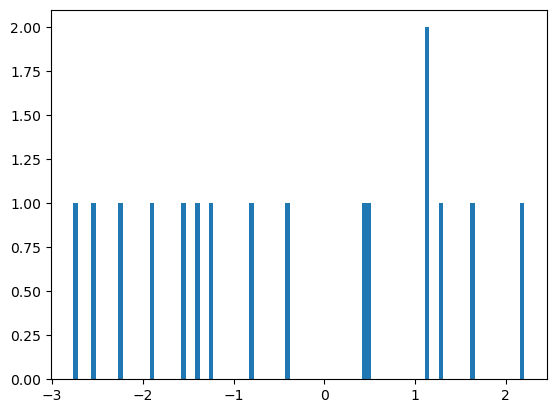

In [24]:
plt.hist(mlp.dense_layer_global_3.kernel.numpy().flatten(), bins=100);

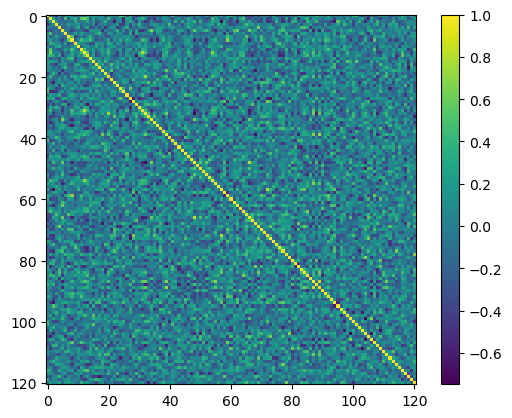

In [78]:
emb = mlp.embedding_layer_node_ops.weights[0].numpy()
emb = emb / np.expand_dims(np.linalg.norm(emb, axis=1), axis=-1)
dots = np.matmul(emb, emb.T)
plt.imshow(dots)
plt.colorbar()

In [89]:
dots[34, 26]

-0.66656613

In [88]:
np.argsort(dots[34])

array([ 26,  31,   8,  64,  59,  55,  46,  85,  32,  93,  87,  45,   4,
        92,  13,  24,  89,  75,  12,  38,   1, 104,  74,   0,  57,  60,
        69,  71,  22,  94,  40,  84,  20,   7,  65,  25,  41,  11,  68,
         9, 115,  54,  72, 119,  28,  17, 101,  21,  47,  18, 110, 111,
        53,  10,  35, 120,  14,  70,  73, 107,  91,  30,  83,  37,  56,
       116,  79,  81,  19,  50,  16,  78, 108,  82,  62,  15,  44, 100,
       109,  39,  43,  98,  42, 105,  97, 118,  88,  33,   3,   2,   6,
        80,  61, 102,  27,  51,  77, 113, 103,  49,  63,  29,  23,  76,
       114, 106,  58,  67,  36, 117,  95,  96, 112,  99,  90,  52,  86,
        66,  48,   5,  34])

In [93]:
ind = np.unravel_index(np.argsort(dots.flatten())[2], dots.shape)
ind

(99, 104)

In [ ]:
val_df[val_df['ID'] == b'layout:xla:default:unet_3d.4x4.bf16'].sort_values('target')

In [ ]:
for val_batch in dataset.valid_data:
    if b'layout:xla:default:mlperf_bert_batch_24_2x2' in val_batch['layout_id'].numpy():
        print(val_batch['layout_id'])
        break

In [ ]:
np.unique(val_batch['layout_id'].numpy())

In [ ]:
b'layout:xla:default:mlperf_bert_batch_24_2x2' in val_batch['layout_id'].numpy()

In [ ]:
layout_ids = val_batch['layout_id']
config_descriptor = val_batch['node_descriptor']
valid_mask = val_batch['valid_nodes']
graph_descriptor = val_batch['graph_descriptor']

with tf.device('/cpu:0'):
    subset_info_str = tf.map_fn(
        lambda layout_id: tf.strings.reduce_join(
            tf.strings.split(layout_id, ":")[:3]),
        layout_ids
    )

subset_info = mlp.text_vectorization(subset_info_str)
subset_info = tf.expand_dims(subset_info, axis=-1)
subset_info = mlp.embedding_layer_subset_info(subset_info)
subset_info = subset_info[:, 0, :]

# for si, sn in zip(subset_info_str.numpy(), subset_info.numpy()):
#     print(si, sn)

node_operations = config_descriptor[:, :, -1]
config_descriptor = config_descriptor[:, :, :-1]
node_operations = tf.cast(node_operations, tf.int32)
# node_operations.shape == (batch_size, mask_max_len)                                                                                                                                 
node_embedding = mlp.embedding_layer_node_ops(node_operations)
# node_embedding.shape == (batch_size, mask_max_len, embed_len)
# np.unique(node_operations.numpy().flatten(), return_counts=True)

x = mlp.normalization_layer_config_nodes(config_descriptor)
normal_graph_descriptor = mlp.normalization_layer_graph_descriptor(graph_descriptor)
x = tf.concat([x, node_embedding], axis=-1)

x = mlp.dense_layer_node_1(x)
x = mlp.relu_layer(x)  # (batch_size, n_config_nodes_upper_limit, n_units)                                                                                                           
x = mlp.dense_layer_node_2(x)
x = mlp.relu_layer(x)  # (batch_size, n_config_nodes_upper_limit, n_units)                                                                                                           

# plt.hist(x.numpy().flatten(), bins=100);
float_mask = tf.sequence_mask(valid_mask, mlp.mask_max_len, dtype=tf.float32)
# (batch_size, n_config_nodes_upper_limit)                                                                                                                                            

float_mask = tf.expand_dims(float_mask, axis=-1)
x = x * float_mask

x = tf.reduce_sum(x, axis=1)
#plt.subplot(2, 1, 1)
#plt.hist(x.numpy().flatten(), bins=100);

x = x / tf.expand_dims(tf.cast(valid_mask, tf.float32), axis=-1)
#plt.subplot(2, 1, 2)
#plt.hist(x.numpy().flatten(), bins=100);
for i, lid, gd, nd in zip(range(96), layout_ids.numpy(), graph_descriptor.numpy(), normal_graph_descriptor.numpy()):
    if i in [19]:
        print(i, gd[80:90], nd[80:90], lid)
x = tf.concat([x, normal_graph_descriptor, subset_info], axis=-1)
#plt.hist(x.numpy().flatten(), bins=100);
x = mlp.dense_layer_global_1(x)
x = mlp.relu_layer(x)
#plt.hist(x.numpy().flatten(), bins=100);
x = mlp.dense_layer_global_2(x)
x = mlp.relu_layer(x)
#plt.hist(x.numpy().flatten(), bins=100);
x = mlp.dense_layer_global_3(x)
x = tf.reshape(x, (-1,))
x

In [ ]:
random_sample = val_df.sample(5_000)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(
    random_sample['target'],
    np.abs(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('abs error')
x_lin = np.linspace(0, 0.7, 100)
#plt.plot(x_lin, x_lin, color='orange')


plt.subplot(1, 2, 2)
plt.scatter(
    random_sample['target'],
    np.square(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('squared error')

In [ ]:
def sort_configs(df):
    top = df.sort_values('prediction')
    top = top['config_index'].values.tolist()
    top = [str(i) for i in top]
    return ';'.join(top)

val_prediction = val_df.groupby('ID').apply(sort_configs)
val_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
val_prediction

In [ ]:
val_df

In [ ]:
val_df['ID'].map(lambda x: ':'.join(x.decode('UTF-8').split(':')[:3])).unique()

In [94]:
def compute_layout_score_group(df):
    score, _ = kendalltau(df['prediction'], df['target'])
    return score

val_df['subset'] = val_df['ID'].map(lambda x: ':'.join(x.decode('UTF-8').split(':')[:3]))
for subset in val_df['subset'].unique():
    mean = np.mean(val_df[val_df['subset'] == subset].groupby('ID').apply(compute_layout_score_group))
    print(subset, mean)

layout:nlp:random 0.8303935903366597
layout:nlp:default 0.42502400140758373
layout:xla:random 0.461640136392107
layout:xla:default 0.18212369131469455


In [95]:
val_scores = val_df.groupby('ID').apply(compute_layout_score_group)
val_scores.sort_values()

ID
b'layout:xla:default:mlperf_bert_batch_24_2x2'                                         -0.033410
b'layout:xla:random:resnet50.4x4.fp16'                                                  0.003998
b'layout:xla:default:resnet50.4x4.fp16'                                                 0.086258
b'layout:xla:default:unet_3d.4x4.bf16'                                                  0.088213
b'layout:xla:random:unet_3d.4x4.bf16'                                                   0.186239
b'layout:xla:default:tf2_bert_pretrain_dynamic_batch_size'                              0.226848
b'layout:nlp:default:small_bert_bert_en_uncased_L-10_H-128_A-2_batch_size_64_train'     0.253358
b'layout:nlp:default:albert_en_xlarge_batch_size_16_test'                               0.285255
b'layout:xla:default:resnet_v1_50_official_batch_128_bf16'                              0.297402
b'layout:xla:default:bert_pretraining.4x4.fp16'                                         0.300681
b'layout:xla:default:incept

In [ ]:
np.mean([0.368, 0.137, 0.738, 0.346, 0.85])

In [ ]:
def layout_score(candidate_order, layout_dict):
    runtimes = layout_dict['config_runtime']
    best_ranking = np.argsort(runtimes)
    assert len(candidate_order) == len(runtimes)
    score, _ = kendalltau(candidate_order, best_ranking)
    return score

In [ ]:
dirpath, filename

In [ ]:
true_order = np.argsort(layout_dict['config_runtime'])
plt.scatter(true_order, candidate_order)

In [ ]:
layout_set = 'valid'
true_orders = []
layout_ids = []
for dirpath, dirnames, filenames in os.walk('predict-ai-model-runtime/npz_all/npz/layout'):
    if len(filenames) == 0:
        continue
    
    if dirpath.split('/')[-1] != layout_set:
        continue
        
    layout_id_prefix = ':'.join(dirpath.split('/')[-4:-1])
    for filename in os.listdir(dirpath):
        print(filename)
        layout_id = layout_id_prefix+':'+filename[:-4]
        layout_dict = dict(np.load(os.path.join(dirpath, filename)))
        runtimes = layout_dict['config_runtime']
        best_ranking = np.argsort(runtimes)
        best_ranking = ';'.join([str(i) for i in best_ranking])
        true_orders.append(best_ranking)
        layout_ids.append(layout_id)
        
true_order_df = pd.DataFrame(
    data=np.stack([layout_ids, true_orders], axis=-1),
    columns=['ID', 'true_order']
)
true_order_df

In [ ]:
# layout_id = true_order_df.sample()['ID'].values[0]
layout_id = 'layout:xla:default:resnet50.4x4.fp16'
true_order = [int(i) for i in true_order_df[true_order_df['ID'] == layout_id]['true_order'].values[0].split(';')]
candidate_order = [int(i) for i in val_prediction[layout_id].split(';')]

plt.scatter(true_order, candidate_order)
plt.xlabel('true order')
plt.ylabel('candidate order')
plt.title(f'{layout_id}, len {len(true_order)}')

In [ ]:
layout_dict = dict(np.load('predict-ai-model-runtime/npz_all/npz/layout/nlp/default/valid/small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train.npz'))
layout_dict['node_config_feat'].shape

In [ ]:
val_df[val_df['ID'] == b'layout:nlp:default:small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train']

In [ ]:
evaluation_result_layout['score'].astype(float).mean()

## Inference over test set

In [ ]:
test_df = mlp.predict_over_dataset(dataset.test_data, return_labels=False)
test_df

In [ ]:
test_prediction = test_df.groupby('ID').apply(sort_configs)
test_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
test_prediction

In [ ]:
pd.DataFrame(test_prediction, columns=['TopConfigs']).to_csv('layout_none_test_prediction_10_15_16_45.csv')

In [ ]:
plt.hist(np.abs(mlp.dense_layer_1.kernel.numpy().flatten()), bins=50)